***

# Decision Tree

***



#### What is it? 
> Decision tree is a supervised machine learning algorithm that can be used to solve classification tasks. A decision tree is essentially a binary tree flow chart where each node splits a group of observations according to features. The goal is to split observations into groups until each observation in the same group belongs to the same class. 
    


#### How does it work?

> Decision tree can be simplified into three steps:
    
        1. Select the best attribute by using Attribute Selection Measures to split the observations
        2. Make the attribute a decision node and then break the dataset into smaller subsets
        3. Repeat the process for each child in the tree until:
            - There are no more remaining attributes
            - There are no more observations

> Examples of decision tree maps are seen below:

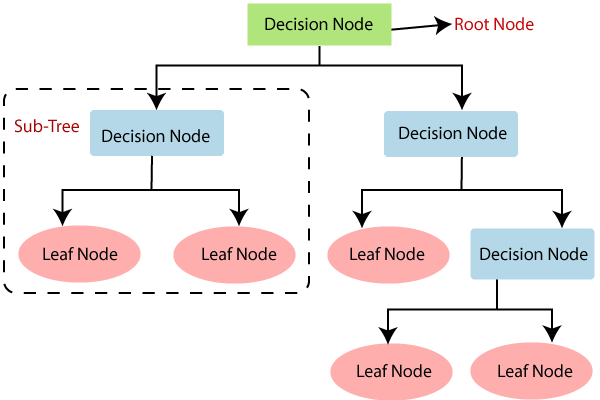

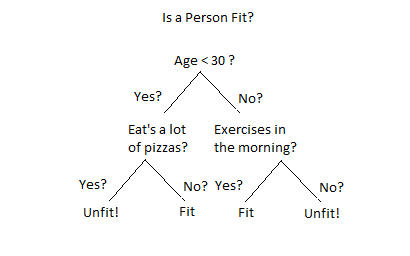

#### Pros and Cons

>Pros

        - Easy to visualize and interpret
        - Easily captures non-linear properties
        - No assumptions need to be met

>Cons

        - Sensitive to noisy data
        - Small variation in data can result in different decision trees
        


### Model Implementation

> Below is an implementation of the decision tree model on a dataset. 


#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    
[Plotly](https://plotly.com/python/)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Collections Counter()](https://docs.python.org/3/library/collections.html)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [1]:
#import libraries

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from collections import Counter

from sklearn.model_selection import GridSearchCV

import matplotlib.patches as mpatches


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and flipper length are selected as features, while the response is species (Adelie or Gentoo, 0 or 1).

In [4]:
#features
X = df[["body_mass_g", "flipper_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()

features = ["body_mass_g","flipper_length_mm" ]

labels = ["Adelie", "Gentoo"]

#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a scatter plot. Below, penguin features are plotted and colored by species type (Adelie purple and Gentoo blue). We can see that there is a clear separation of the data points within each class/species.

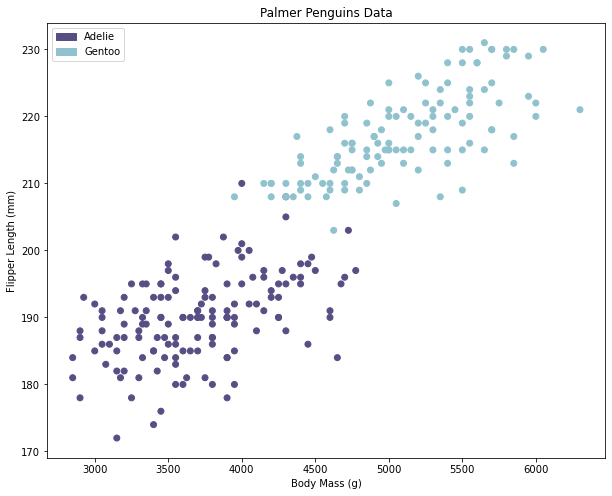

In [5]:
#scatter plot of data features
colors = ["#574E84" if label == "Adelie" else "#90C2CE" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.title("Palmer Penguins Data")

purple_patch = mpatches.Patch(color='#574E84', label='Adelie')

blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')

plt.legend(handles=[purple_patch, blue_patch])

plt.show()

> Next, the data is then divided into train and test sets. The decision tree model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 70% of the data will be used to train the model, while 30% of the data will be used to test the model.

In [6]:
#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1234)

#### Model Building

>  With data preparation now complete, model building can now begin. Below the model is built using the DecisionTreeClassifier() from sklearn. Here are the steps:

        1. Create and train an instance of the DecisionTreeClassifer class
        2. Use the trained model to classify observations in test data set


> For more information on scikit learn DecisionTreeClassifier(), you can scroll up to the "Libraries Used" header and select the hyper link "DecisionTreeClassifier" or click [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [7]:
#step 1
#Create and train an instance of the DecisionTreeClassifer class
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

> Next, we can take a look at the decision tree produced by the model now that the model has been trained. Below is the decision tree produced.

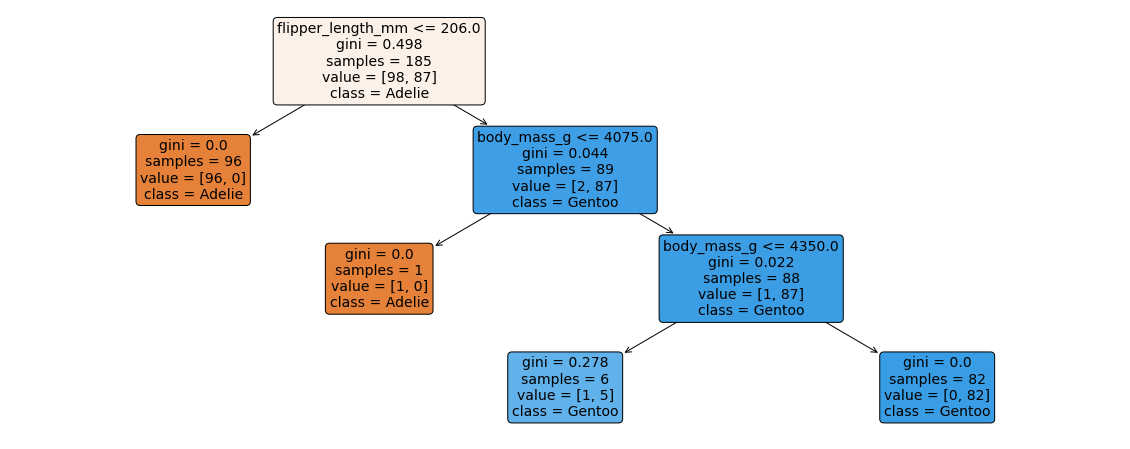

In [8]:
plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

#### Using Model on Prepared Data

> Below, predictions are made by passing X_test to decision_tree.predict().

In [9]:
#step 2
#Use the trained model to classify observations in test data set
y_pred = decision_tree.predict(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tells us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> The model has a decent accuracy score at 0.97. Therefore, the model is 97% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.96 and 1.00 respectively.

In [10]:
#classification report
print(classification_report(y_test, y_pred))

#accuracy
np.sum(y_test == y_pred) / len(y_test)

# print(Counter(y_test))
# Counter(y_pred)

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
      Gentoo       1.00      0.94      0.97        32

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



0.975

> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 48 observations labeled Adelie and 32 observations labeled Gentoo
        - The model predicted that there are 50 observations labeled Adelie and 30 labeled Gentoo
        - There are 48 observations correctly classifed as Adelie (True Positive)
        - There are 0 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 30 observations correctly classified as Gentoo (True Negative)
        - There are 2 observations incorrectly classified as Adelie, when it should be Gentoo (False Positive)

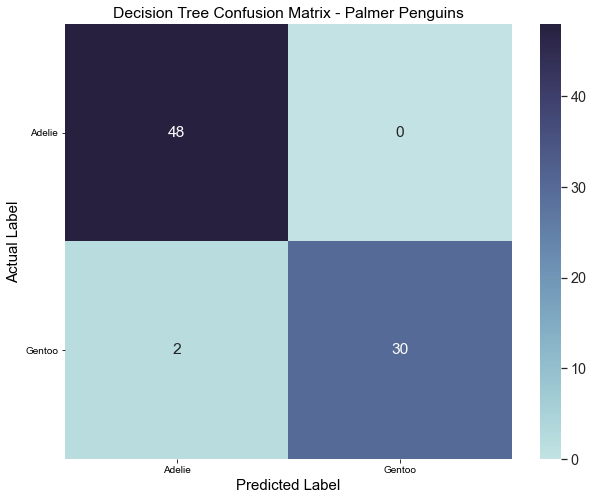

In [11]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(cm)

#plot confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Decision Tree Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Model Improvement

> Below, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is used to find the optimal values for model parameters max_depth, which controls how deep the tree goes, and min_sample_split which determines the number of samples needed to split an internal node. After cross validation, it is suggested that setting max_depth to 1 and min_samples_split to 2 will improve the model.

In [12]:
#cross validation using gridSearchCV:

tuned_param = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']

for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    dtc = GridSearchCV(
        DecisionTreeClassifier(), tuned_param,
        scoring = f'{score}_macro'
    )
    dtc.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(dtc.best_params_)
    print()
    print("Grid scores on development set:")
    means = dtc.cv_results_["mean_test_score"]
    stds = dtc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 dtc.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 1, 'min_samples_split': 2}

Grid scores on development set:
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 2}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 4}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 6}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 8}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 10}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 2}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 4}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 6}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 8}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 10}
0.985 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 2}
0.985 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 4}
0.985 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 6}
0.985 (+/-0.025) for {'max_depth': 

### Applying Optimal Parameter Values to Model

> It was determined that setting min_sample_split to 2 and max_depth to 1 will improve the model. Below, the model is trained again by passing X_train and y_train to decision_tree.fit() with max_depth set to 1 and min_samples_split set to 2. 

In [13]:
#new model with optimal parameters
decision_tree = DecisionTreeClassifier(max_depth=1, min_samples_split = 2,random_state=42)

#train new model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

> Next, we can take a look at the decision tree produced by the tuned model now that the tuned model has been trained. Below is the decision tree produced.

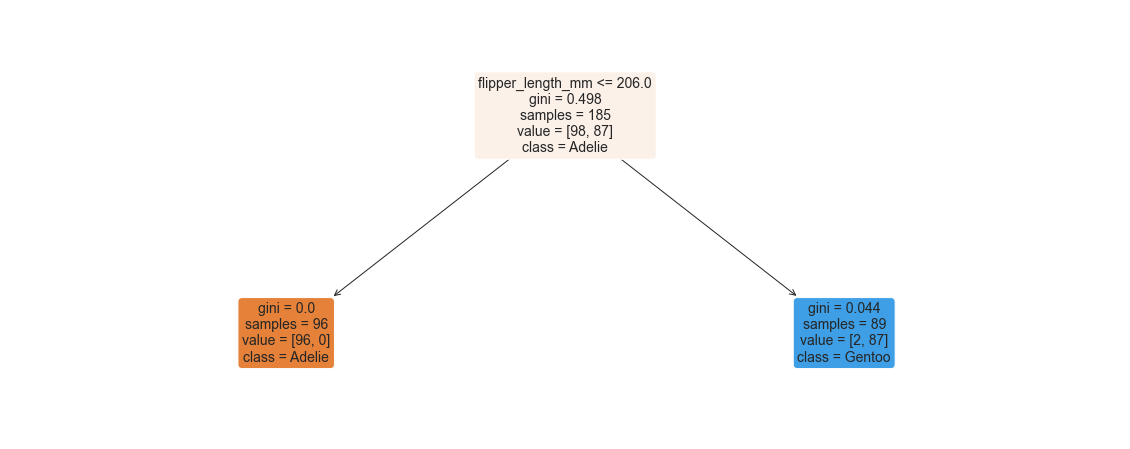

In [14]:
plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

#### Using Model on Prepared Data

> Below, predictions are made by passing X_test to decision_tree.predict().

In [15]:
#new predictions for y
y_pred = decision_tree.predict(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> The model has a decent accuracy score at 0.99. Therefore, the model is 99% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.98 and 1.00 respectively.

In [16]:
print(classification_report(y_test, y_pred))

#accuracy
np.sum(y_test == y_pred) / len(y_test)

# print(Counter(y_test))
# Counter(y_pred)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



0.9875

> Below, is a confusion matrix. The confusion matrix below tells us the following:

        - There are 48 observations labeled Adelie and 32 observations labeled Gentoo
        - The model predicted that there are 49 observations labeled Adelie and 31 labeled Gentoo
        - There are 48 observations correctly classifed as Adelie (True Positive)
        - There are 0 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 31 observations correctly classified as Gentoo (True Negative)
        - There is 1 observation incorrectly classified as Adelie, when it should be Gentoo (False Positive)

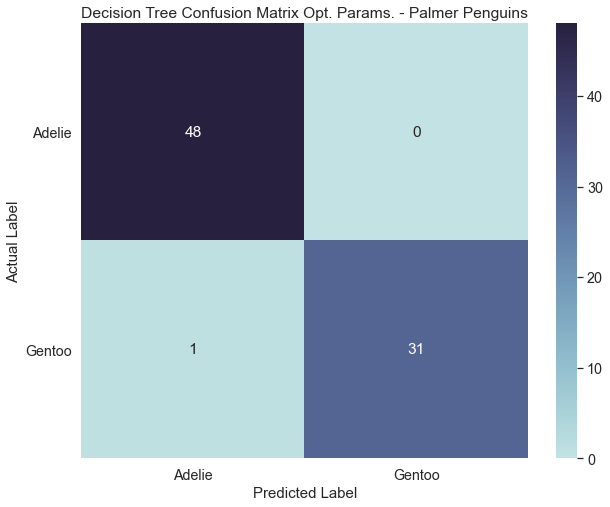

In [17]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(cm)

#plot confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Decision Tree Confusion Matrix Opt. Params. - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()


#### Conclusion

>  Based on the confusion matrix and classification report above, we can see that setting min_sample_split to 2 and max_depth to 1 produced a better classifier. Overall, the classifier with min_sample_split as 2 and max_depth as 1 had higher values for precision, accuracy, f1-score and recall than the classifier with max_depth set to 3. The improved model was about 99% accurate at classifying data from the Palmer Penguins test dataset.